# Credit Fraud Detection
This notebook contains the code for training an ml model on the credit fraud detection dataset. 

In [1]:
import sys
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Data Analysis and Pre Processing

In [2]:
filepath = os.path.join("data", "creditcard.csv")
df = pd.read_csv(filepath)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# check number of samples
num_samples, num_features = df.shape

print(f"There are {num_samples} samples with {num_features} features each.")

There are 284807 samples with 31 features each.


In [4]:
# check data imbalance on target
count_neg_class = np.sum(df["Class"] == 0)
count_pos_class = np.sum(df["Class"] == 1)

print(f"There are {count_neg_class} negative samples ({np.round(100 * count_neg_class / num_samples, 2)} % of total data).")
print(f"There are {count_pos_class} positive samples ({np.round(100 * count_pos_class / num_samples, 2)} % of total data).")

There are 284315 negative samples (99.83 % of total data).
There are 492 positive samples (0.17 % of total data).


In [5]:
# check data types to look for possible columns that need to be transformed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

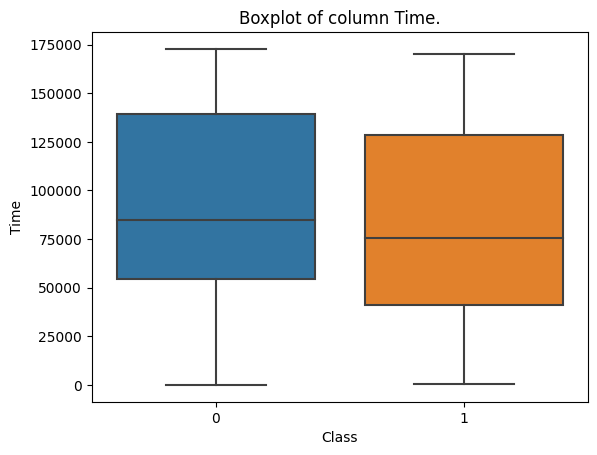

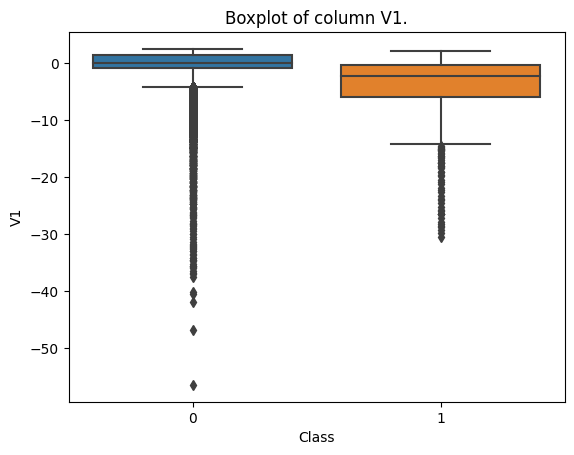

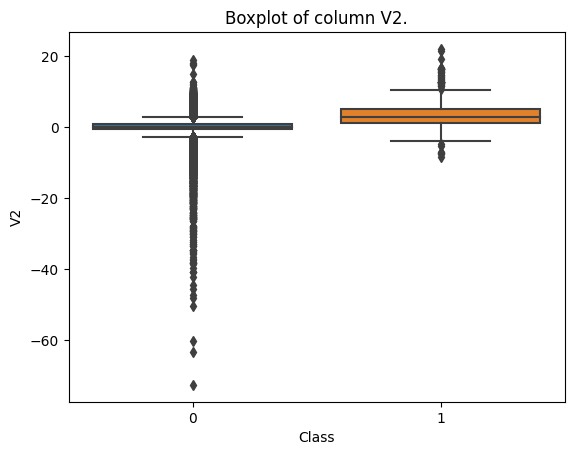

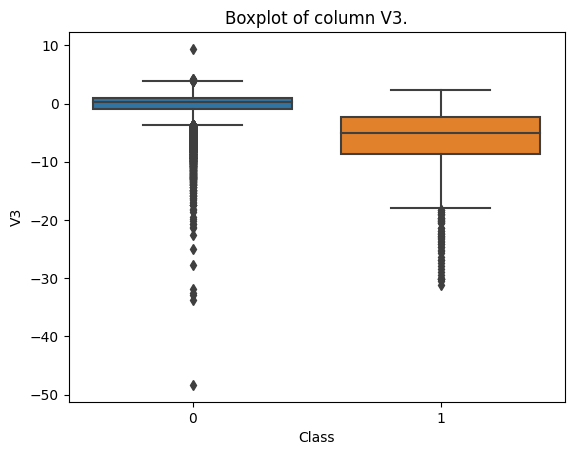

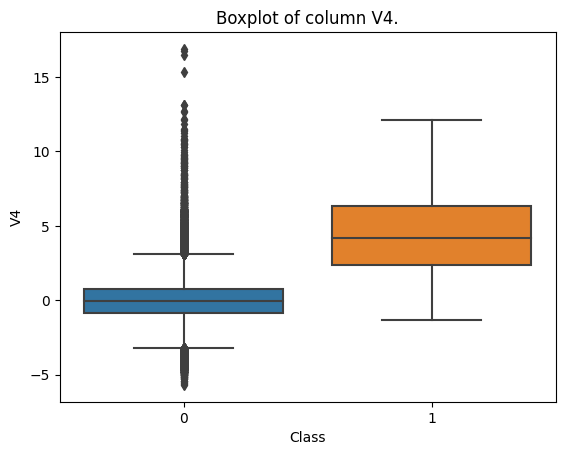

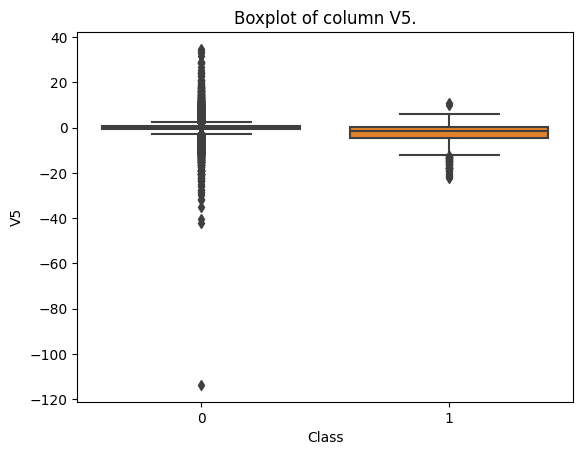

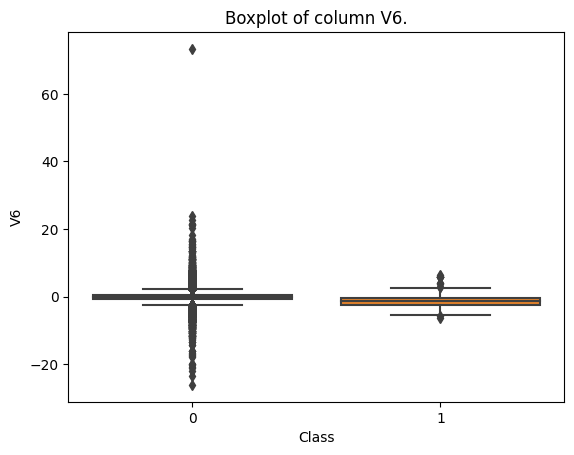

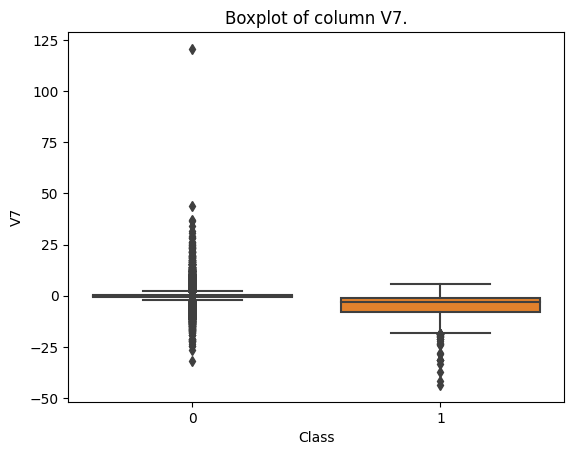

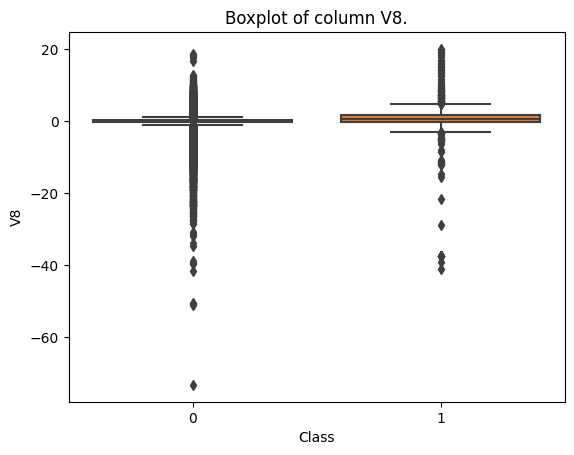

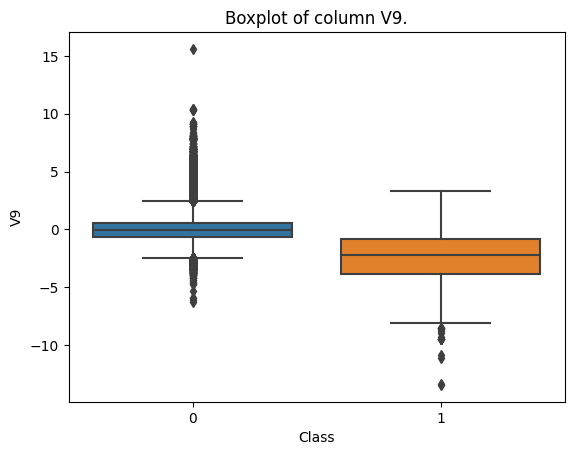

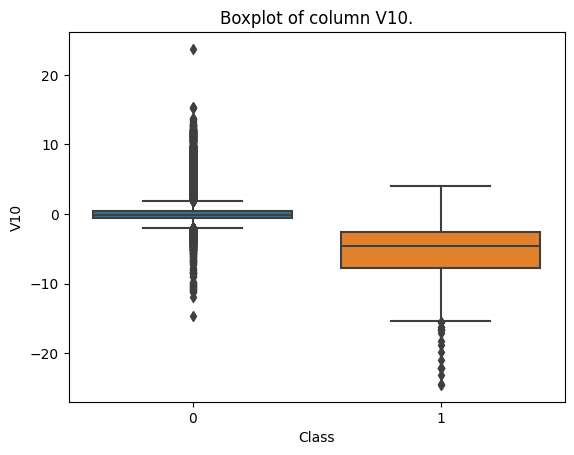

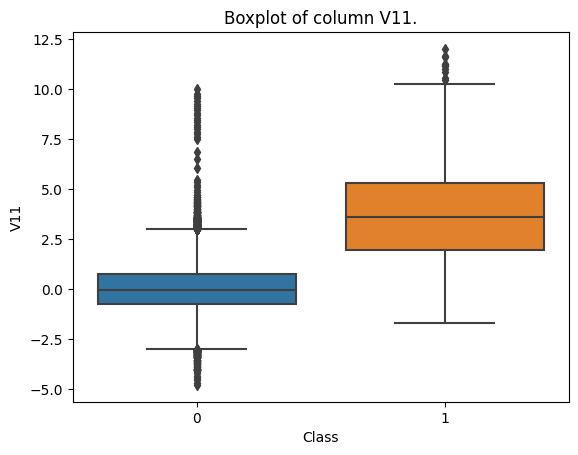

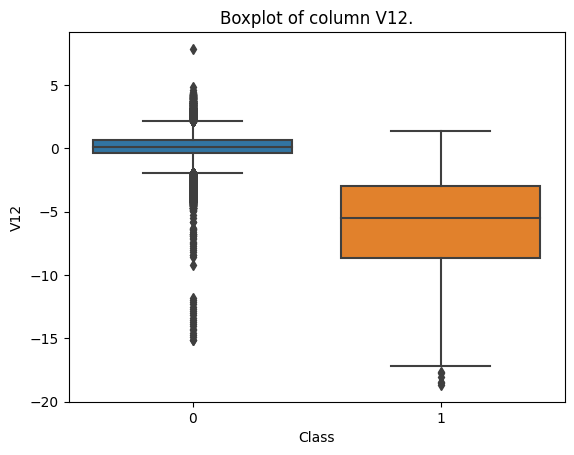

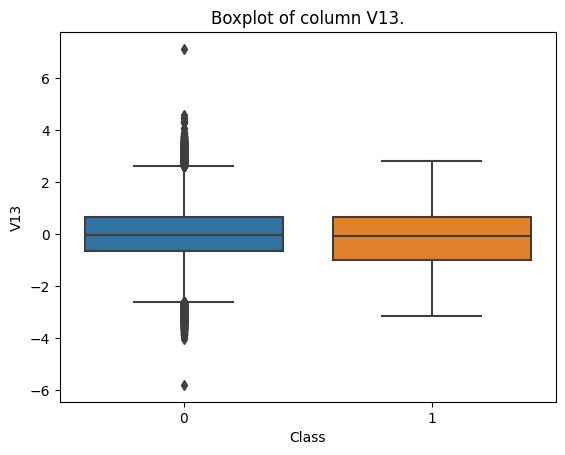

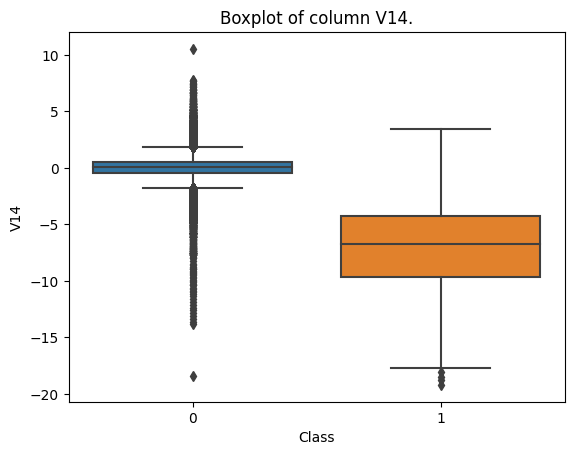

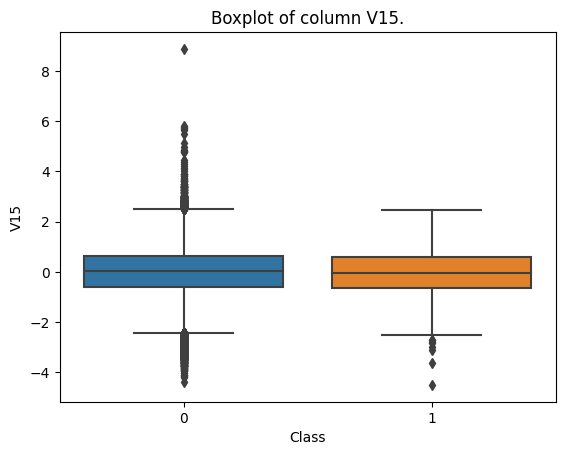

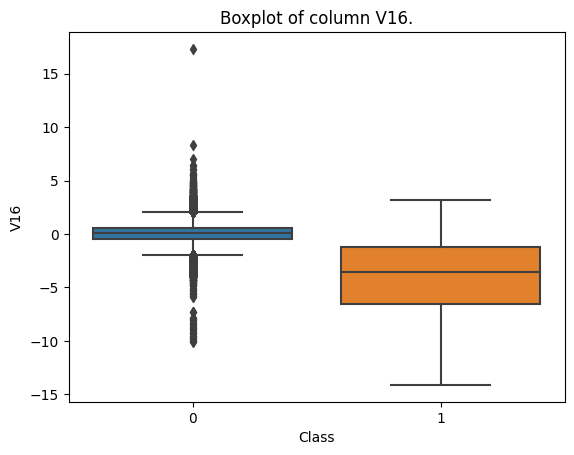

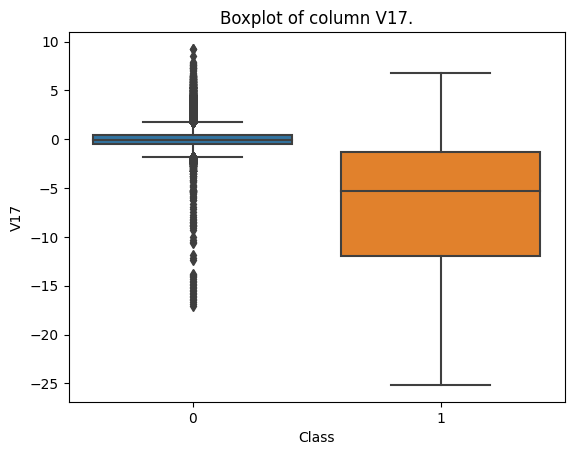

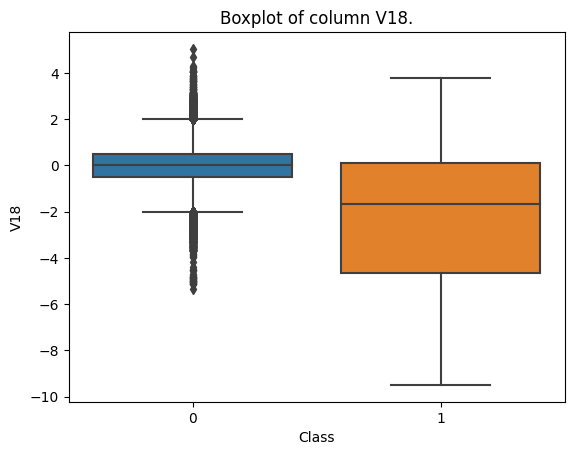

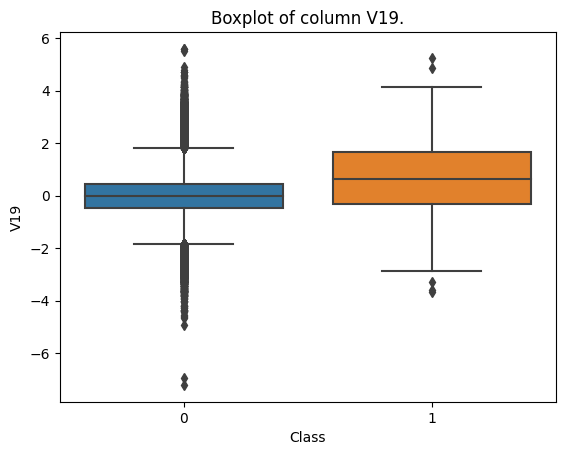

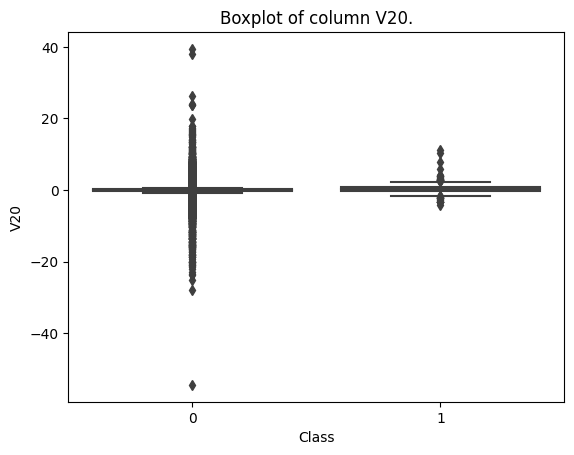

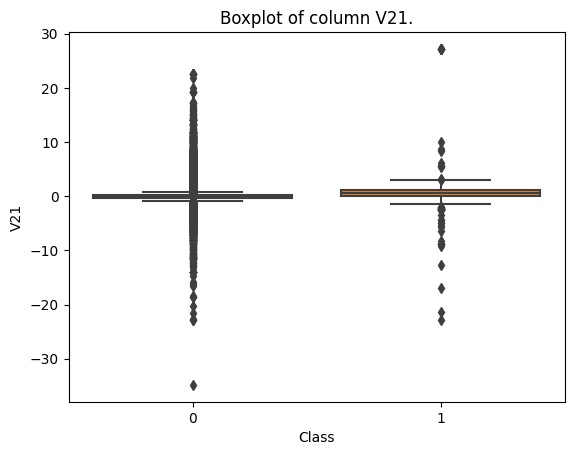

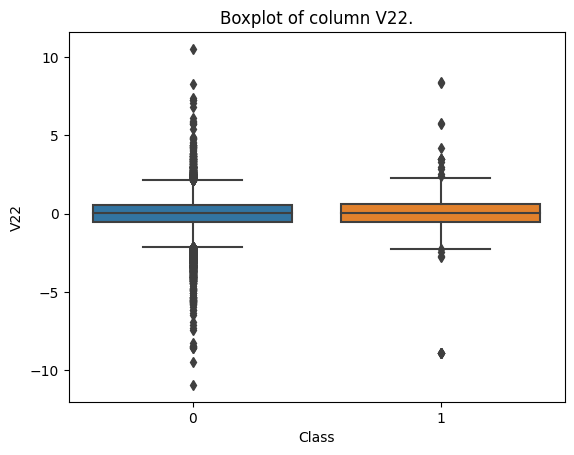

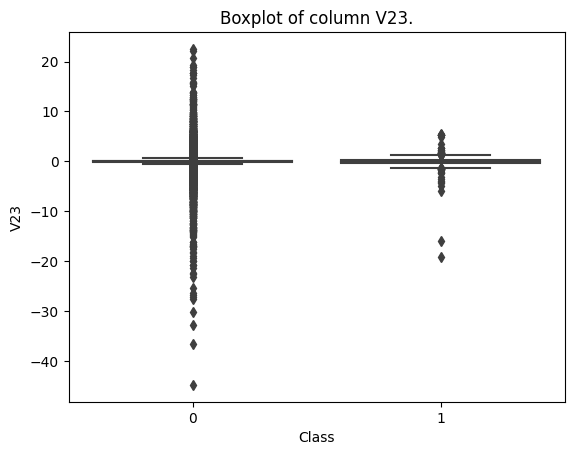

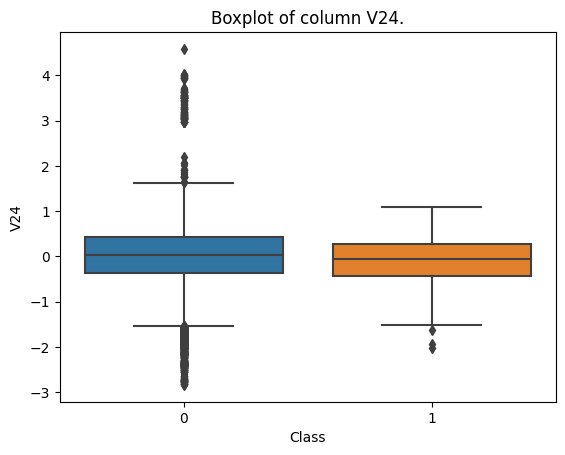

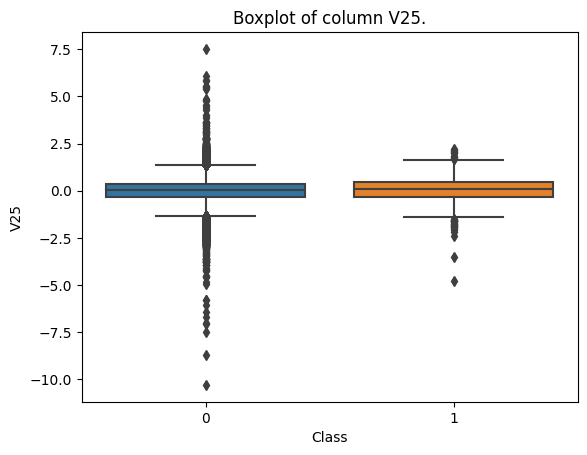

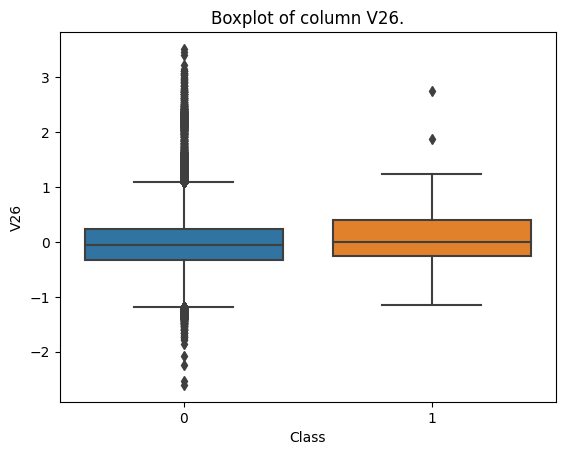

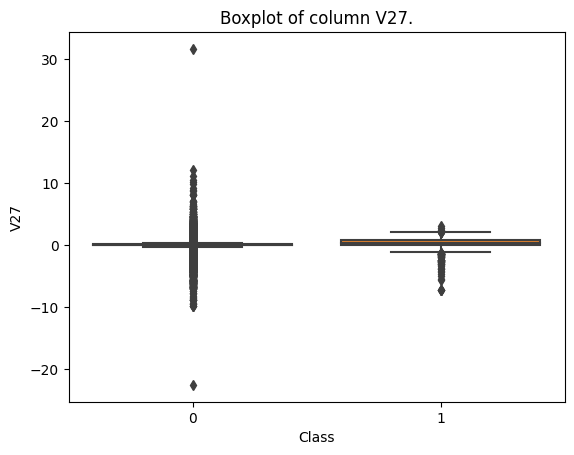

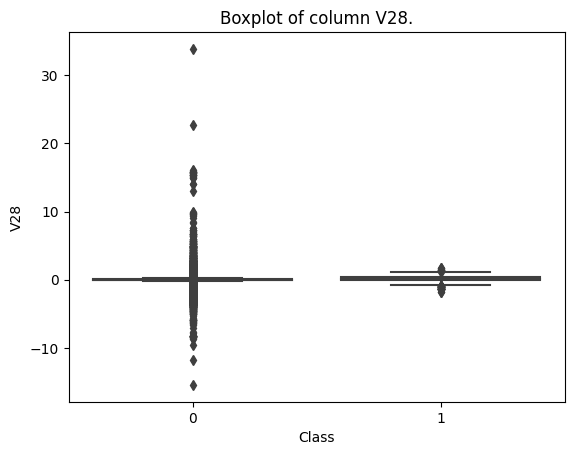

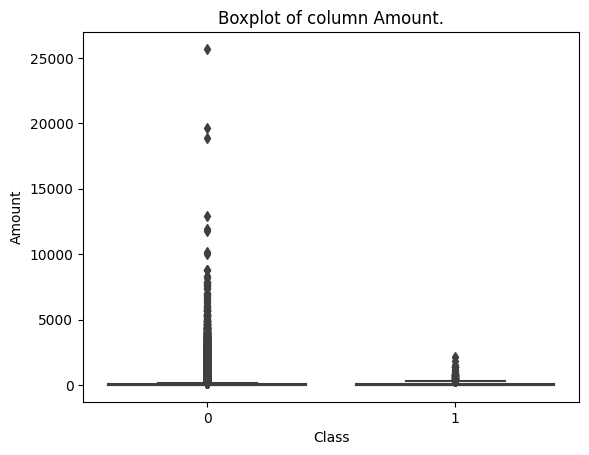

In [6]:
# create boxplots to get more insights of numerical features and their influence on the potability
for feature in df.drop(columns="Class").columns:
    sns.boxplot(x="Class", y=feature, data=df)
    plt.title(f"Boxplot of column {feature}.")
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Class").to_numpy()
y = df["Class"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
print(f"Shape training data: {X_train.shape} | Shape training labels: {y_train.shape}")
print(f"Shape testing data: {X_test.shape} | Shape testing labels: {y_test.shape}")

Shape training data: (227845, 30) | Shape training labels: (227845,)
Shape testing data: (56962, 30) | Shape testing labels: (56962,)


In [9]:
# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train

### Baseline Model

Let's first start with a very simple baseline model (first without and then with imbalance fixing) so that we have something to compare other more complex strategies to.

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [16]:
# Train the logistic regression model and use this as baseline for comparison
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

preds = log_model.predict(X_test)
print(f"Test Acc: {accuracy_score(y_test, preds)}")
print(f"Test F1-Score: {f1_score(y_test, preds)}")
print(f"Test Precision: {precision_score(y_test, preds)}")
print(f"Test Recall: {recall_score(y_test, preds)}")

Test Acc: 0.9991397773954567
Test F1-Score: 0.7065868263473053
Test Precision: 0.8676470588235294
Test Recall: 0.5959595959595959


In [17]:
# Train the logistic regression model and use this as baseline for comparison
from sklearn.linear_model import LogisticRegression

log_model_balanced = LogisticRegression(class_weight="balanced")
log_model_balanced.fit(X_train, y_train)

preds = log_model_balanced.predict(X_test)
print(f"Test Acc: {accuracy_score(y_test, preds)}")
print(f"Test F1-Score: {f1_score(y_test, preds)}")
print(f"Test Precision: {precision_score(y_test, preds)}")
print(f"Test Recall: {recall_score(y_test, preds)}")

Test Acc: 0.9811979916435518
Test F1-Score: 0.13559322033898302
Test Precision: 0.07368421052631578
Test Recall: 0.8484848484848485


## Other Models
Let's now train a bunch of other models to find the best suited, which we are then using for a small hyperparameter optimization.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict

In [19]:
dict_models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Nearest Neighbor": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Ada Boost": AdaBoostClassifier()
}

In [20]:
results_dict = {}
for model_name, model in dict_models.items():
    print(f"Start training {model_name}...")
    preds = cross_val_predict(model, X_train, y_train, cv=5)
    
    f1 = f1_score(y_train, preds)
    precision = precision_score(y_train, preds)
    recall = recall_score(y_train, preds)

    print(f"F1-Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("\n\n")
    results_dict[model_name] = (f1, precision, recall)

Start training Decision Tree...
F1-Score: 0.7698113207547169
Precision: 0.7611940298507462
Recall: 0.7786259541984732



Start training SVM...
F1-Score: 0.7970370370370371
Precision: 0.9539007092198581
Recall: 0.6844783715012722



Start training Nearest Neighbor...
F1-Score: 0.8484848484848484
Precision: 0.924924924924925
Recall: 0.7837150127226463



Start training Random Forest...
F1-Score: 0.8693259972489683
Precision: 0.9461077844311377
Recall: 0.8040712468193384



Start training Ada Boost...
F1-Score: 0.7791164658634537
Precision: 0.8220338983050848
Recall: 0.7404580152671756





In [21]:
df_results = (pd.DataFrame.from_dict(results_dict, orient="index", columns=["F1-Score", "Precision", "Recall"])
             .sort_values(by="F1-Score", ascending=False))
df_results

,F1-Score,Precision,Recall
Random Forest,0.869326,0.946108,0.804071
Nearest Neighbor,0.848485,0.924925,0.783715
SVM,0.797037,0.953901,0.684478
Ada Boost,0.779116,0.822034,0.740458
Decision Tree,0.769811,0.761194,0.778626


So the random forest achieved the best f1-score with an IMO acceptable Recall of almost 80% and a precision of 94%. Let's now try to find the best suited hyperparameters to maybe get some more percentages out of our model.

In [15]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "n_estimators": [10, 20, 30, 60, 80, 100],
    "criterion" : ["gini", "entropy"],
    "max_depth" : [4, 5, 10, None],
    "min_samples_split": [2, 4, 6],
    "class_weight": [None, "balanced", "balanced_subsample"]
}

clf_rf = RandomizedSearchCV(RandomForestClassifier(), params, n_iter=50, scoring="f1", cv=5, verbose=1, n_jobs=-1)
clf_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 10, None],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 20, 30, 60, 80,
                                                         100]},
                   scoring='f1', verbose=1)

In [16]:
print(f"Best f1-score: {clf_rf.best_score_}")
print(f"Best parameters: {clf_rf.best_params_}")
best_random_forest_model = clf_rf.best_estimator_

Best f1-score: 0.8654221331533234
Best parameters: {'n_estimators': 80, 'min_samples_split': 2, 'max_depth': None, 'criterion': 'entropy', 'class_weight': None}


### Evaluate Final Model on Testset

In [17]:
final_preds = best_random_forest_model.predict(X_test)

f1 = f1_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)

print(f"F1-Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

F1-Score: 0.8208092485549132
Precision: 0.9594594594594594
Recall: 0.7171717171717171


### Get Feature Importance

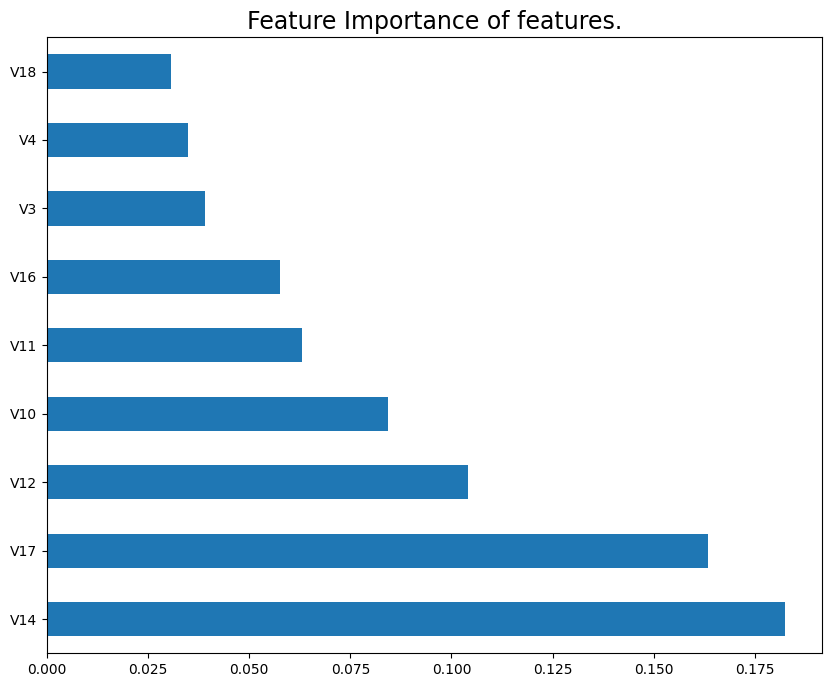

In [19]:
fig = plt.figure(figsize=(10, 8))
feat_importances = pd.Series(best_random_forest_model.feature_importances_, index=df.drop(columns="Class").columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.title("Feature Importance of features.", size=17)
plt.show()